подключение библиотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Задаем начальные значения времени t, тока I и заряда Q

In [ ]:
t0 = 0; I0 = 0; Q0 = 0;
dt = 0.02; t = np.arange(0, 4, dt)

Функция для генерации сигнала E

In [ ]:
def signale(t, freq):
    return np.sin(2 * np.pi * freq * t)

In [ ]:
E = signale(t, 3)
ss = np.zeros_like(t)
ss[1] = 0.0

Задаем начальные значения для I и Q

In [ ]:
I = np.zeros_like(t)
Q = np.zeros_like(t)
I[0] = I0
Q[0] = Q0

Задаем значения для R и C

In [ ]:
R = 1.0  # Сопротивление в омах
C = 0.1  # Ёмкость в фарадах

Определяем Uc и Ur

In [ ]:
Uc = np.zeros_like(t)
Ur = np.zeros_like(t)

реализуем псевдокод
1. t(1)=t0; I(1)=0; Q(1)=Q0;кт
2. dt=0.02; t=0:dt:4;
3. E=signale(t,3);
4. ss(1)=0.0
5. for k=2:length(t)
6. {
6. Q(k)=Q(k-1)+I(k-1)*dt;
7. Uc(k)=Q(k)/C;
8. Ur(k)=E(k)-Uc(k);
9. I(k)=Ur(k)/R;
10. ss(k)=ss(k-1)+E(k)*dt;
11. }
11. end;

где Q - заряд, I - сила тока, t - время, ss - массив для нахождения численного интеграла, Uc и Ur - напряжение.

In [ ]:
for k in range(1, len(t)):
    Q[k] = Q[k-1] + I[k-1] * dt
    Uc[k] = Q[k] / C
    Ur[k] = E[k] - Uc[k]
    I[k] = Ur[k] / R
    ss[k] = ss[k-1] + E[k] * dt

Проверяем, что E = Ur + Uc

In [ ]:
E_check = Ur + Uc
assert np.allclose(E, E_check), "E is not equal to Ur + Uc"

Выводим на экран сигнал E, производную, интеграл, Uc, Ur

Сигнал E

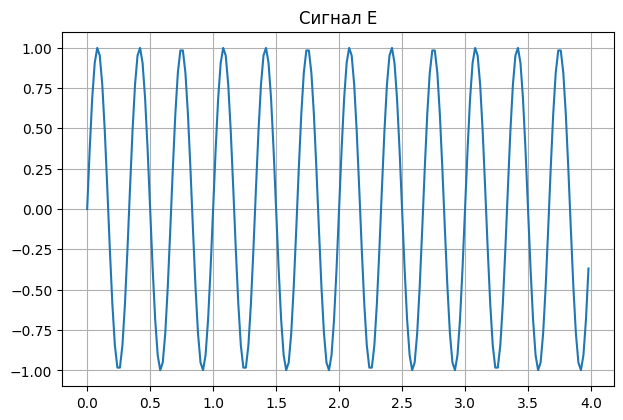

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(t, E, label='E')
plt.title('Сигнал E')
plt.grid(True)
plt.tight_layout()
plt.show()

Производная сигнала E

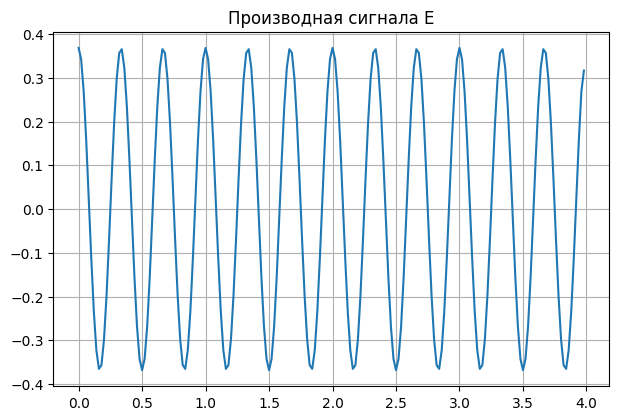

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 2)
plt.plot(t, np.gradient(E), label='dE/dt')
plt.title('Производная сигнала E')
plt.grid(True)
plt.tight_layout()
plt.show()

Интеграл сигнала E

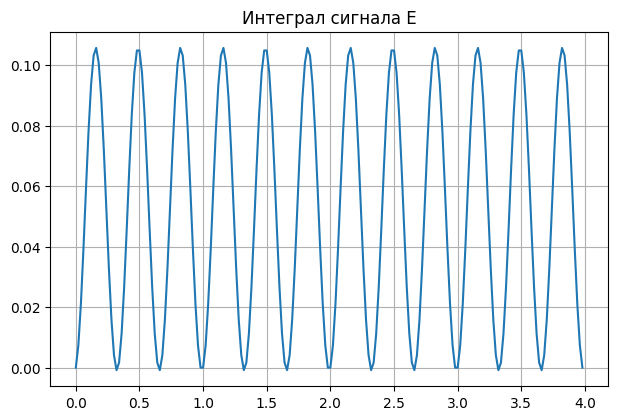

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 3)
plt.plot(t, ss, label='∫E dt')
plt.title('Интеграл сигнала E')
plt.grid(True)
plt.tight_layout()
plt.show()

Напряжения Uc и Ur

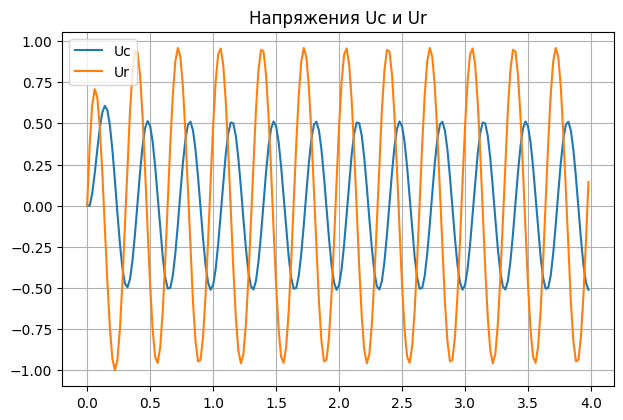

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 4)
plt.plot(t, Uc, label='Uc')
plt.plot(t, Ur, label='Ur')
plt.title('Напряжения Uc и Ur')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()